In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
OF_19_20_df = pd.read_csv(Path('data/outfield_19_20.csv'))
OF_19_20_df.head()

,Player,Pos,Squad,MP,Starts,Min,Gls,Ast,PK,PKatt,...,G-PK,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA
0,Patrick van Aanholt,DF,Crystal Palace,20,20,1714.0,3,0,1,1,...,0.11,0.11,1.8,1.0,1.6,0.09,0.08,0.18,0.05,0.14
1,Max Aarons,DF,Norwich City,25,25,2250.0,0,0,0,0,...,0.00,0.00,0.5,0.5,3.4,0.02,0.14,0.16,0.02,0.16
2,Tammy Abraham,FW,Chelsea,25,23,1945.0,13,3,0,0,...,0.60,0.74,12.2,12.2,2.3,0.56,0.11,0.67,0.56,0.67
3,Che Adams,FW,Southampton,21,8,712.0,0,2,0,0,...,0.00,0.25,1.9,1.9,0.9,0.24,0.11,0.35,0.24,0.35
4,Sergio Agüero,FW,Manchester City,21,16,1342.0,16,3,2,3,...,0.94,1.14,13.3,11.0,2.5,0.89,0.17,1.06,0.74,0.91


### Goals vs Goals Expected 

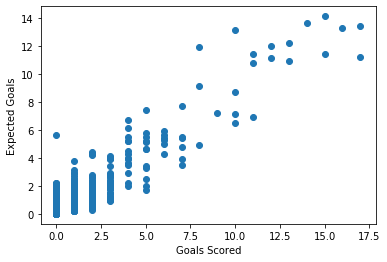

In [3]:
plt.scatter(OF_19_20_df.Gls, OF_19_20_df.xG)
plt.xlabel('Goals Scored')
plt.ylabel('Expected Goals')
plt.show()

In [4]:
X = OF_19_20_df.Gls.values.reshape(-1, 1)
y = OF_19_20_df.xG

In [5]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

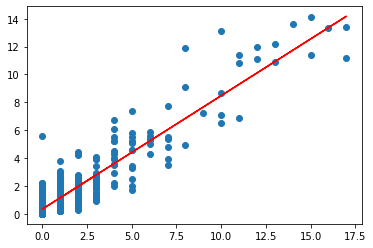

In [6]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [7]:
print(model.coef_)

[0.81440555]


### Polynomial Models

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

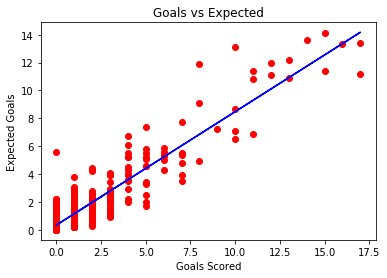

In [12]:
# Fitting Linear Regression to the dataset
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Goals vs Expected')
    plt.xlabel('Goals Scored')
    plt.ylabel('Expected Goals')
    plt.show()
    return
viz_linear()

In [13]:
# Predicting a new result with Linear Regression
lin_reg.predict([[5.5]])

array([4.81089779])

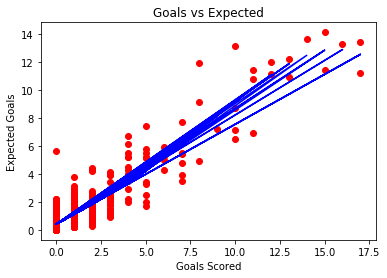

In [14]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Goals vs Expected')
    plt.xlabel('Goals Scored')
    plt.ylabel('Expected Goals')
    plt.show()
    return
viz_polymonial()

In [15]:
# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_reg.fit_transform([[5.5]]))

array([4.64142751])

## Forwards 

In [16]:
FWD_19_20_df = pd.read_csv(Path('data/FWD_19_20.csv'))
FWD_19_20_df.head()

,Player,Pos,Squad,MP,Starts,Min,Gls,Ast,PK,PKatt,...,G-PK,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA
0,Tammy Abraham,FW,Chelsea,25,23,1945.0,13,3,0,0,...,0.60,0.74,12.2,12.2,2.3,0.56,0.11,0.67,0.56,0.67
1,Che Adams,FW,Southampton,21,8,712.0,0,2,0,0,...,0.00,0.25,1.9,1.9,0.9,0.24,0.11,0.35,0.24,0.35
2,Sergio Agüero,FW,Manchester City,21,16,1342.0,16,3,2,3,...,0.94,1.14,13.3,11.0,2.5,0.89,0.17,1.06,0.74,0.91
3,Miguel Almirón,FW,Newcastle Utd,26,26,2200.0,2,1,0,0,...,0.08,0.12,4.4,4.4,0.6,0.18,0.03,0.20,0.18,0.20
4,Michail Antonio,FW,West Ham,13,8,850.0,1,1,0,0,...,0.11,0.21,3.1,3.1,1.2,0.33,0.13,0.46,0.33,0.46


In [21]:
X = FWD_19_20_df.Gls.values.reshape(-1, 1)
y = FWD_19_20_df.xG

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

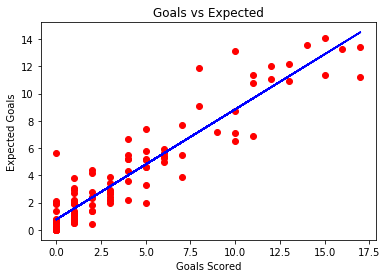

In [23]:
# Fitting Linear Regression to the dataset
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Goals vs Expected')
    plt.xlabel('Goals Scored')
    plt.ylabel('Expected Goals')
    plt.show()
    return
viz_linear()

In [24]:
# Predicting a new result with Linear Regression
lin_reg.predict([[5.5]])

array([5.20349328])

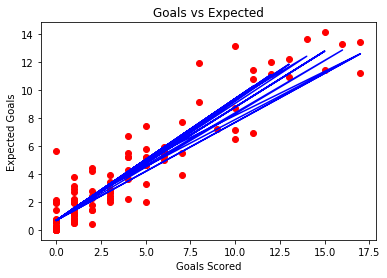

In [25]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Goals vs Expected')
    plt.xlabel('Goals Scored')
    plt.ylabel('Expected Goals')
    plt.show()
    return
viz_polymonial()

In [26]:
# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_reg.fit_transform([[5.5]]))

array([5.22291931])

## Midfielders

In [27]:
MID_19_20_df = pd.read_csv(Path('data/MID_19_20.csv'))

In [31]:
X = MID_19_20_df.Gls.values.reshape(-1, 1)
y = MID_19_20_df.xG

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

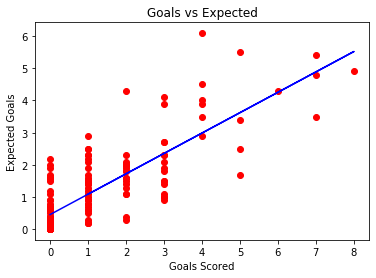

In [33]:
# Fitting Linear Regression to the dataset
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Goals vs Expected')
    plt.xlabel('Goals Scored')
    plt.ylabel('Expected Goals')
    plt.show()
    return
viz_linear()

In [35]:
# Predicting a new result with Linear Regression
lin_reg.predict([[5.5]])

array([3.93624299])

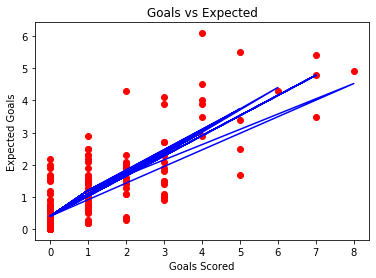

In [36]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Goals vs Expected')
    plt.xlabel('Goals Scored')
    plt.ylabel('Expected Goals')
    plt.show()
    return
viz_polymonial()

In [37]:
# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_reg.fit_transform([[5.5]]))

array([4.08671243])

## Defenders

In [38]:
DEF_19_20_df = pd.read_csv(Path('data/DEF_19_20.csv'))

In [39]:
X = DEF_19_20_df.Gls.values.reshape(-1, 1)
y = DEF_19_20_df.xG

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

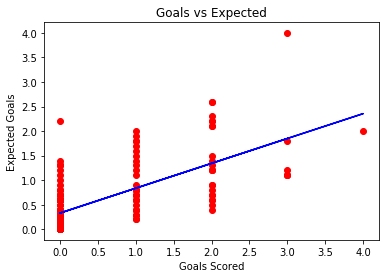

In [41]:
# Fitting Linear Regression to the dataset
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Goals vs Expected')
    plt.xlabel('Goals Scored')
    plt.ylabel('Expected Goals')
    plt.show()
    return
viz_linear()

In [42]:
# Predicting a new result with Linear Regression
lin_reg.predict([[5.5]])

array([3.11430965])

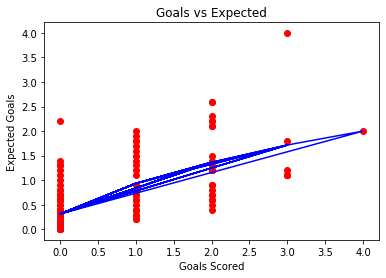

In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Goals vs Expected')
    plt.xlabel('Goals Scored')
    plt.ylabel('Expected Goals')
    plt.show()
    return
viz_polymonial()

In [44]:
# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_reg.fit_transform([[5.5]]))

array([2.0494992])